In [11]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, labs, geom_bar, geom_density, geom_point, geom_boxplot, geom_line
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

## Part One: Data Exploration

### 1.

In [12]:
insurance = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")

In [13]:
insurance.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [14]:
insurance.describe()

,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


In [16]:
insurance.groupby("smoker").mean(numeric_only = True)

,age,bmi,charges
smoker,,,
no,38.299419,30.780247,7528.467642
yes,36.620690,30.724023,31152.372644


In [6]:
insurance.groupby("smoker").count()

,age,sex,bmi,region,charges
smoker,,,,,
no,344,344,344,344,344
yes,87,87,87,87,87


In [17]:
insurance.groupby("sex").mean(numeric_only = True)

,age,bmi,charges
sex,,,
female,37.666667,30.904844,11919.373162
male,38.281553,30.620413,12709.661784


In [8]:
insurance.groupby("sex").count()

,age,bmi,smoker,region,charges
sex,,,,,
female,225,225,225,225,225
male,206,206,206,206,206


### 2.

In [9]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      431 non-null    int64  
 1   sex      431 non-null    object 
 2   bmi      431 non-null    float64
 3   smoker   431 non-null    object 
 4   region   431 non-null    object 
 5   charges  431 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 20.3+ KB


No null values to drop from the dataset.

### 3.

### Visualizations

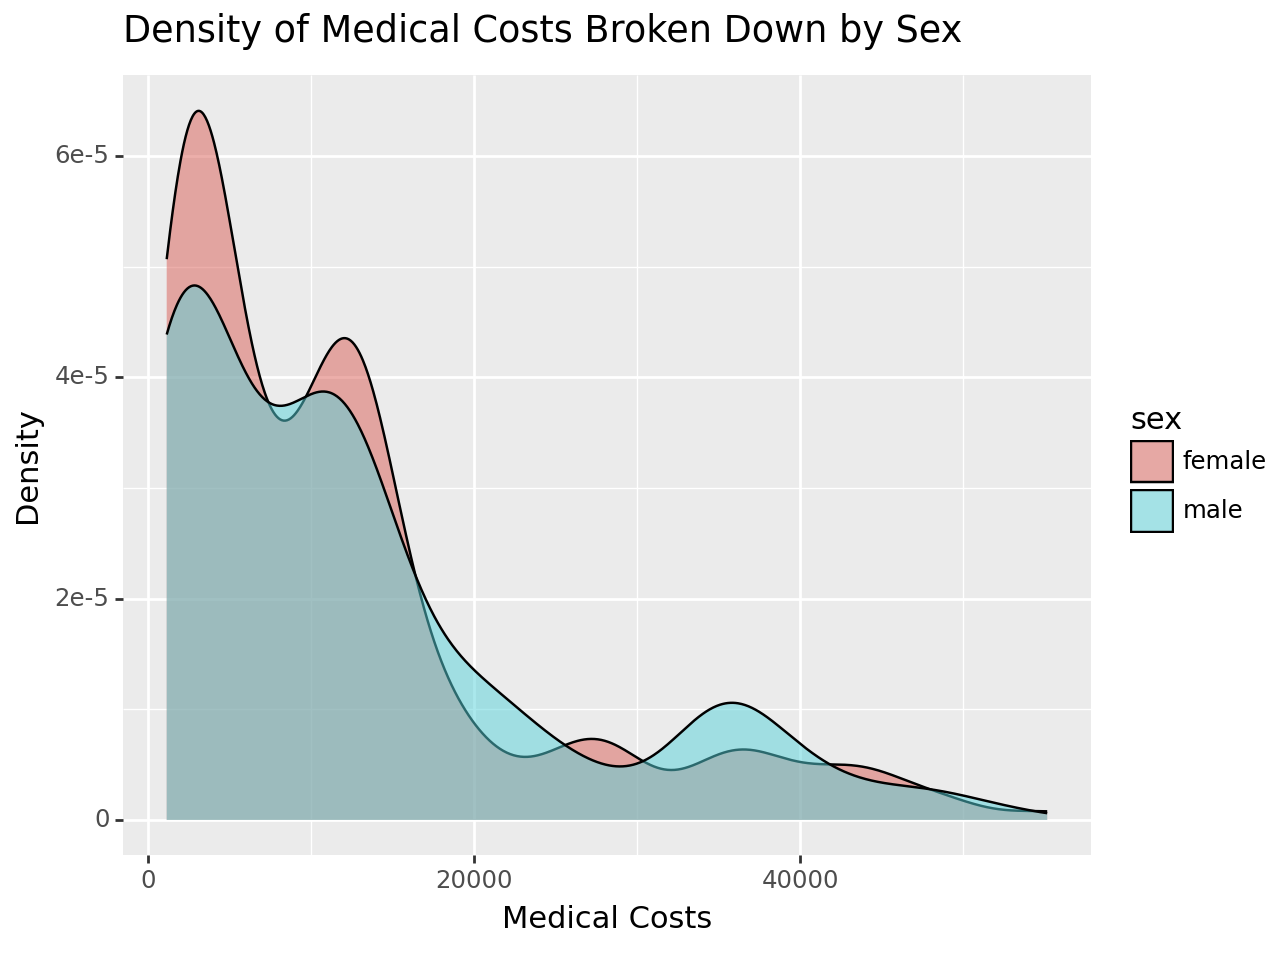

<Figure Size: (640 x 480)>

In [10]:
(ggplot(insurance,
        aes(x = "charges",
            fill = "sex"
            ))
+ geom_density(alpha = 0.5)
+ labs(title = "Density of Medical Costs Broken Down by Sex", x = "Medical Costs", y = "Density")
)

In the above density plot, the density of medical costs is displayed broken down by sex. For both sexes, the highest number of medical costs are low, showing that most people have lower medical costs overall. There are a higher number of females overall that have these lower medical costs, although they trend in the same two peaks as the men at around $300 and $1,200. The densities of both male and females lower as medical costs increase, with men having an additional peak at $3,600.

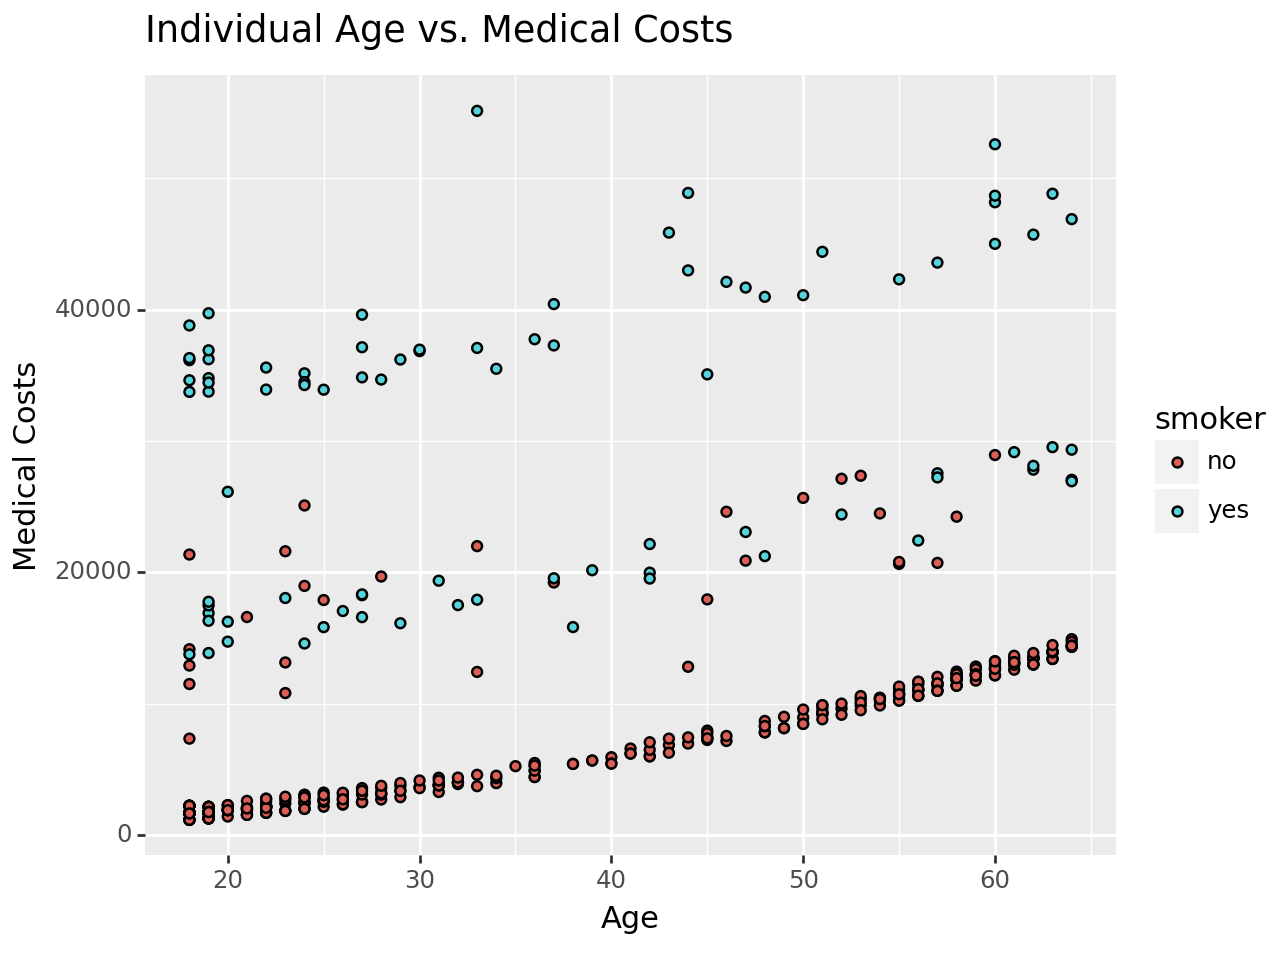

<Figure Size: (640 x 480)>

In [11]:
(ggplot(insurance,
        aes(x = "age",
            y = "charges",
            fill = "smoker"
            ))
+ geom_point()
+ labs(title = "Individual Age vs. Medical Costs", x = "Age", y = "Medical Costs")
)

This scatterplot of age vs. medical costs shows a clear linear relationship between a person's age and their medical costs. This positive relationship shows that as a person's age increases, so do their medical costs. This logically makes sense, as when most people get older they have more medical complications, leading to more medical bills. One interesting thing about this plot is that there are 3 clear groups of data. When coloring by whether the person is a smoker or not, interestingly we see that the lower and very tightly grouped data is completely comprised of non-smokers. As for the smokers, there are still 2 groups that I am interested in why they are separated.

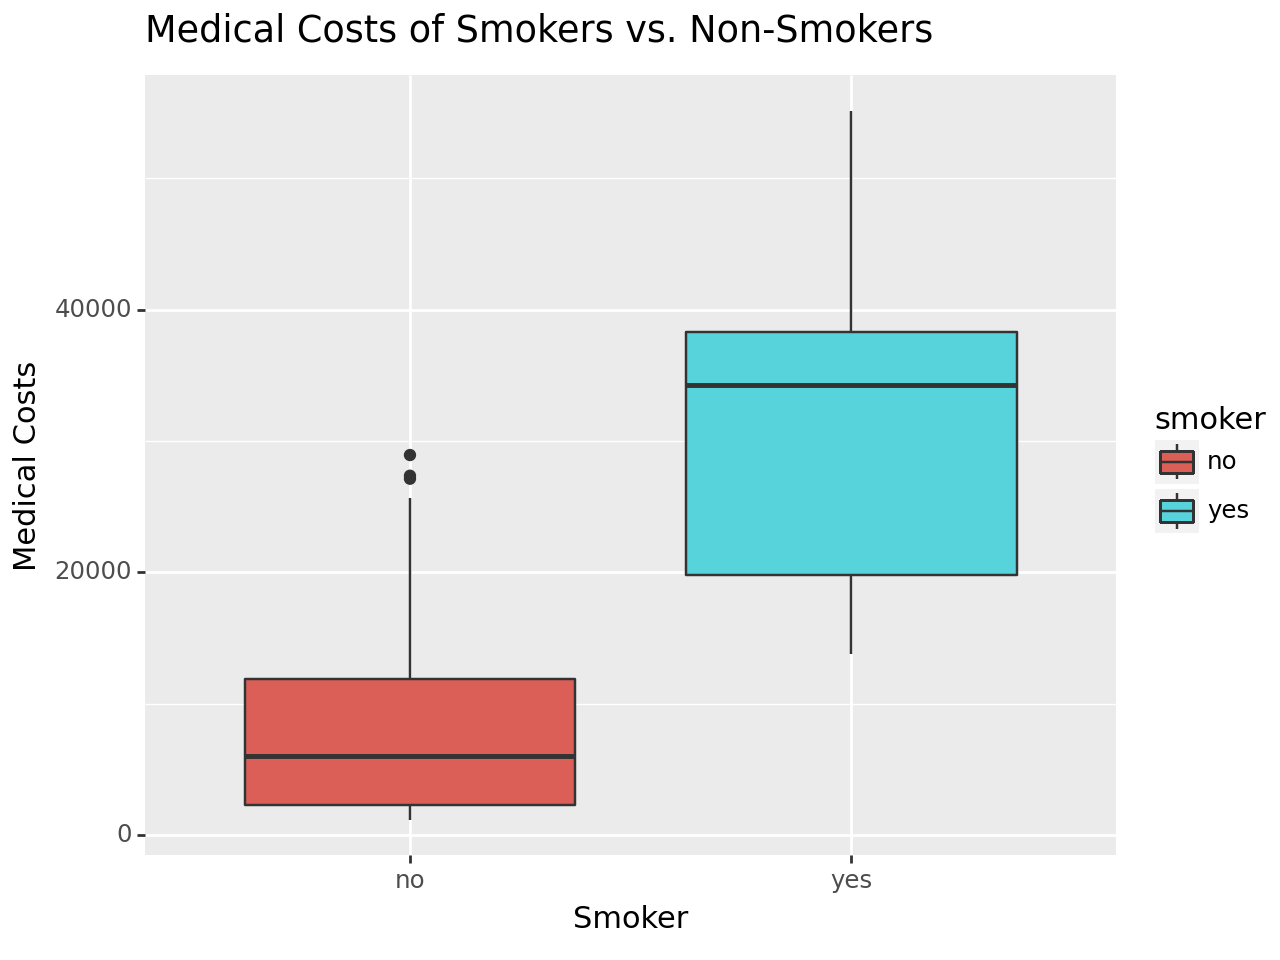

<Figure Size: (640 x 480)>

In [12]:
(ggplot(insurance,
        aes(x = "smoker",
            y = "charges",
            fill = "smoker"
            ))
+ geom_boxplot()
+ labs(x = "Smoker", y = "Medical Costs", title = "Medical Costs of Smokers vs. Non-Smokers")
)

This boxplot of medical costs broken down by smokers vs. non-smokers shows a drastic difference in the average medical costs between the two groups. The average medical costs of non-smokers sits below 1,000, while the average medical costs of smokers is well above 3,000. In addition, the 75th percentile of non-smokers' medical costs is well underneath the 25th percentile of smokers' medical costs, further displaying the divide between the two groups of people.

# Part Two: Simple Linear Models

### 1.

### Model 1: Age as Predictor Variable

In [13]:
X = insurance[['age']]
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

In [14]:
## Model Spec: Simple Linear Regression

lr = LinearRegression()

my_pipeline = Pipeline(
  [('ols', lr)]
)

In [15]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

In [16]:
y_preds = fitted_pipeline.predict(X_test)

In [17]:
plot_model_1 = X_test
plot_model_1['charges'] = y_test
plot_model_1['linear_predictions'] = y_preds

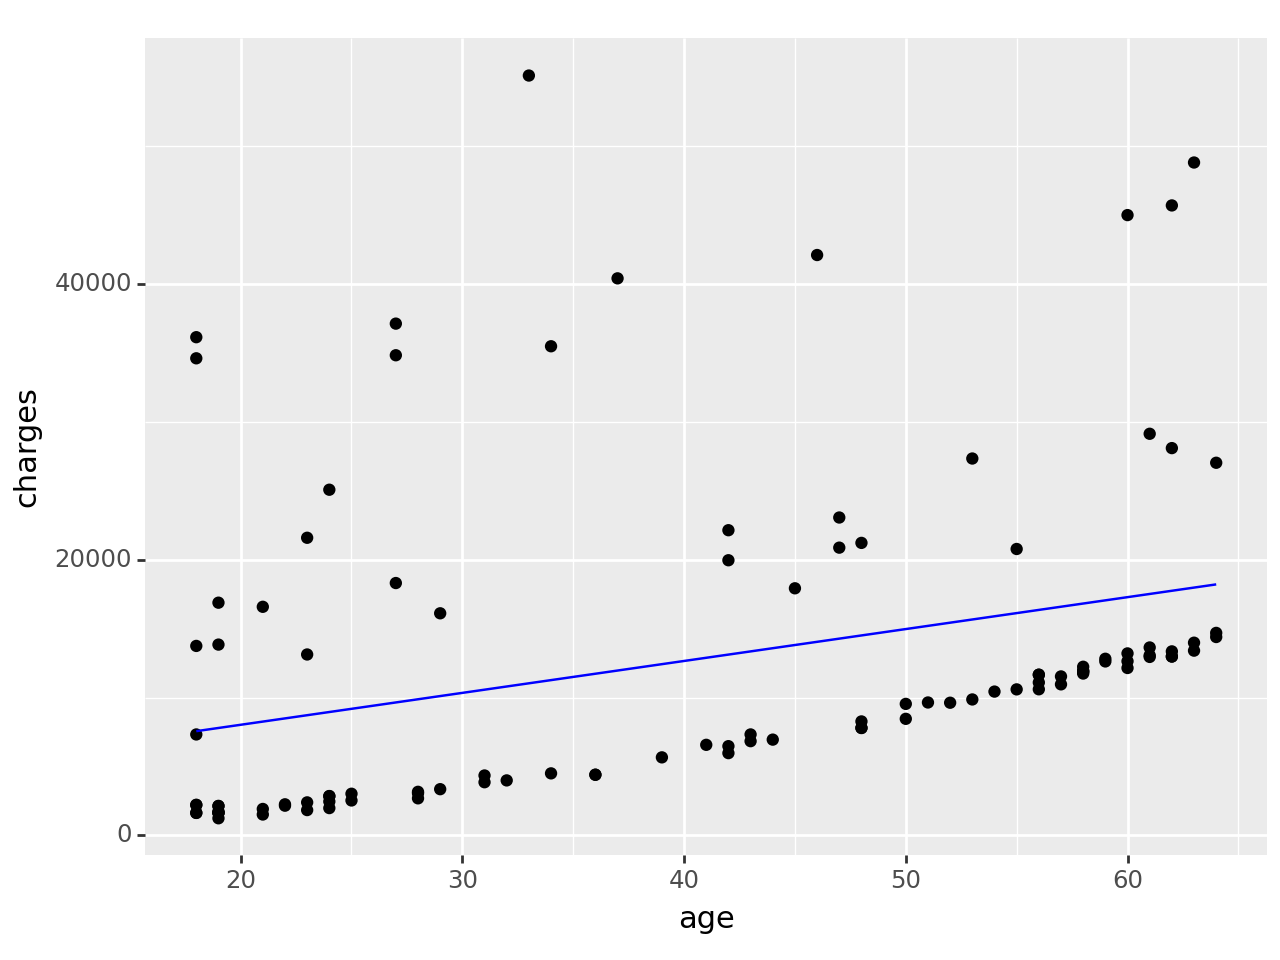

<Figure Size: (640 x 480)>

In [18]:
(ggplot(plot_model_1,
  aes(
      x = "age",
      y = "charges"
))
+ geom_point()
+ geom_line(aes(y = "linear_predictions"), color = "blue")
)

In [19]:
mse_model_1 = mean_squared_error(y_test, y_preds)
r_sq_model_1 = r2_score(y_test, y_preds)

In [20]:
r_sq_model_1

0.08838794754058032

In [21]:
mse_model_1

127146604.81917322

Based off of the extremely low r-squared and very high MSE, the model appears to be performing poorly. This makes sense, as there are a lot of missing variables that would be helpful for predicting medical expenses.

In [22]:
age_coef = fitted_pipeline.named_steps['ols'].coef_[0]
model1_int = fitted_pipeline.named_steps['ols'].intercept_

In [23]:
age_coef

231.51634193241955

In [24]:
model1_int

3395.309620492364

The coefficient estimates in context predict that for every year increase in age, the amount a person spends on medical costs will go up by roughly 231.52 dollars, starting at 3,395.31 dollars. The intercept in context likely should not be trusted, as there are no datapoints below the age of 18, meaning that an estimate at age 0 would be inaccurate.

### 2.

## Model 2: Age and Sex as Predictor Variables

In [25]:
X = insurance[['age','sex']]
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

In [26]:
## Preprocessing: One-Hot-Encode
## Model Spec: Linear Regression

lr = LinearRegression()
enc = OneHotEncoder(sparse_output = False)


ct = ColumnTransformer(
    [('dummify_sex', enc, ['sex'])], remainder = "passthrough"
)

my_pipeline = Pipeline(
  [('dummify', ct), ('ols', lr)]
).set_output(transform = "pandas")

In [28]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

In [29]:
fitted_pipeline.named_steps['ols'].intercept_

3440.633557635032

In [30]:
y_preds = fitted_pipeline.predict(X_test)

In [31]:
mse_model_2 = mean_squared_error(y_test, y_preds)
r_sq_model_2 = r2_score(y_test, y_preds)

In [32]:
r_sq_model_2

0.050705269492591576

In [33]:
mse_model_2

132402376.24230173

Due to the even lower R^2, we know that this model predicts worse than Model1. This, along with the extremely high MSE show this model is performing extremely poor and should not be used for this data.

### 3.

### Model 3: Age and Smoker as Predictor Variables

In [34]:
X = insurance[['age','smoker']]
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

In [35]:
## Preprocessing: One-Hot-Encode
## Model Spec: Linear Regression

lr = LinearRegression()
enc = OneHotEncoder(sparse_output = False)


ct = ColumnTransformer(
    [('dummify_smoker', enc, ['smoker'])], remainder = "passthrough"
)

my_pipeline = Pipeline(
  [('dummify', ct), ('ols', lr)]
)

In [36]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)
y_preds = fitted_pipeline.predict(X_test)

In [37]:
mse_model_3 = mean_squared_error(y_test, y_preds)
r_sq_model_3 = r2_score(y_test, y_preds)
num_variables_model_3 = 3

In [38]:
r_sq_model_3

0.6928395455537408

In [39]:
mse_model_3

42841040.56346345

Model 3 has a fair R^2 at 0.69, indicating that the model does a good job at predicting medical costs from age and whether or not the individual smokes. The MSE of 42,841,040 is also lower than both Model 1 and Model 2.

### 4.

It is clear based on the decent R^2 that comparatively to Model 2, Model 3 is the far superior model. This model outperforms using the metric of R^2 by a vast margin. In addition, the MSE for Model 3 is far below that of Model 2's, confirming that Model 3 is the superior model.

# Part Three: Multiple Linear Models

### 1.

### Model 4: Age and BMI as Predictor Variables

In [40]:
X = insurance[['age','bmi']]
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

In [41]:
## Model Spec: Linear Regression

lr = LinearRegression()

my_pipeline = Pipeline(
  [('ols', lr)]
)

In [42]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)
y_preds = fitted_pipeline.predict(X_test)

In [43]:
mse_model_4 = mean_squared_error(y_test, y_preds)
r_sq_model_4 = r2_score(y_test, y_preds)
num_variables_model_4 = 2

In [44]:
r_sq_model_4

0.06281832604917958

In [45]:
mse_model_4

130712914.13942836

Compared to Model 1, Model 4 has a lower R^2 and a higher MSE, meaning that Model 1 is superior.

### 2.

## Model 5: Age and Age^2 as Predictor Variables

In [46]:
X = insurance[['age']]
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

In [47]:
## Preprocessing: Polynomial Deg 2
## Model Spec: Linear Regression

lr = LinearRegression()
poly = PolynomialFeatures(2)

ct = ColumnTransformer(
    [('square_age', poly, ['age'])]
)

my_pipeline = Pipeline(
  [('poly' , poly), ('ols', lr)]
)

In [48]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)
y_preds = fitted_pipeline.predict(X_test)

In [49]:
mse_model_5 = mean_squared_error(y_test, y_preds)
r_sq_model_5 = r2_score(y_test, y_preds)
num_variables_model_5 = 2

In [50]:
r_sq_model_5

0.08797972583855074

In [51]:
mse_model_5

127203541.32334353

When compared to Model 1, Model 5 has a slightly lower R^2 and a higher MSE, meaning that Model 1 is the superior model.

### 3.

### Model 6: Age, Age^2, Age^3 and Age^4 as Predictor Variables

In [52]:
X = insurance[['age']]
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

In [53]:
## Preprocessing: Polynomial Deg 4
## Model Spec: Linear Regression

lr = LinearRegression()
poly = PolynomialFeatures(4)

ct = ColumnTransformer(
    [('quad_age', poly, ['age'])]
)

my_pipeline = Pipeline(
  [('poly' , poly), ('ols', lr)]
)

In [54]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)
y_preds = fitted_pipeline.predict(X_test)

In [55]:
mse_model_6 = mean_squared_error(y_test, y_preds)
r_sq_model_6 = r2_score(y_test, y_preds)
num_variables_model_6 = 4

In [56]:
r_sq_model_6

0.10372840971526576

In [57]:
mse_model_6

125007002.03901468

Model 6 has a higher R^2 and lower MSE than Model 1, making it the superior model.

### 4.

### Model 7: Age, Age^2 ... Age^12 as Predictor Variables

In [58]:
X = insurance[['age']]
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

In [59]:
## Preprocessing: Polynomial Deg 10
## Model Spec: Linear Regression

lr = LinearRegression()
poly = PolynomialFeatures(12)

ct = ColumnTransformer(
    [('deg12_age', poly, ['age'])]
)

my_pipeline = Pipeline(
  [('poly' , poly), ('ols', lr)]
)

In [60]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)
y_preds = fitted_pipeline.predict(X_test)

In [61]:
mse_model_7 = mean_squared_error(y_test, y_preds)
r_sq_model_7 = r2_score(y_test, y_preds)
num_variables_model_7 = 12

In [62]:
r_sq_model_7

0.07967091779883162

In [63]:
mse_model_7

128362407.89327796

The R^2 of Model 7 is lower than Model 1, and the MSE is higher than Model 1. Therefore, Model 1 would be considered a superior model.

### 5.

According to the R^2 and MSE, Model 6 is superior with an R^2 of 0.1037 and a MSE of 125,007,002.04. I would agree that out of these models it is the best option, because it conforms to the data without overfitting like we saw with model 7. It is the happy medium that allows for enhanced predictions without being only usable on this particular set of data.

### 6.

In [64]:
plot_model_7 = X_test
plot_model_7['charges'] = y_test
plot_model_7['deg_12_predictions'] = y_preds

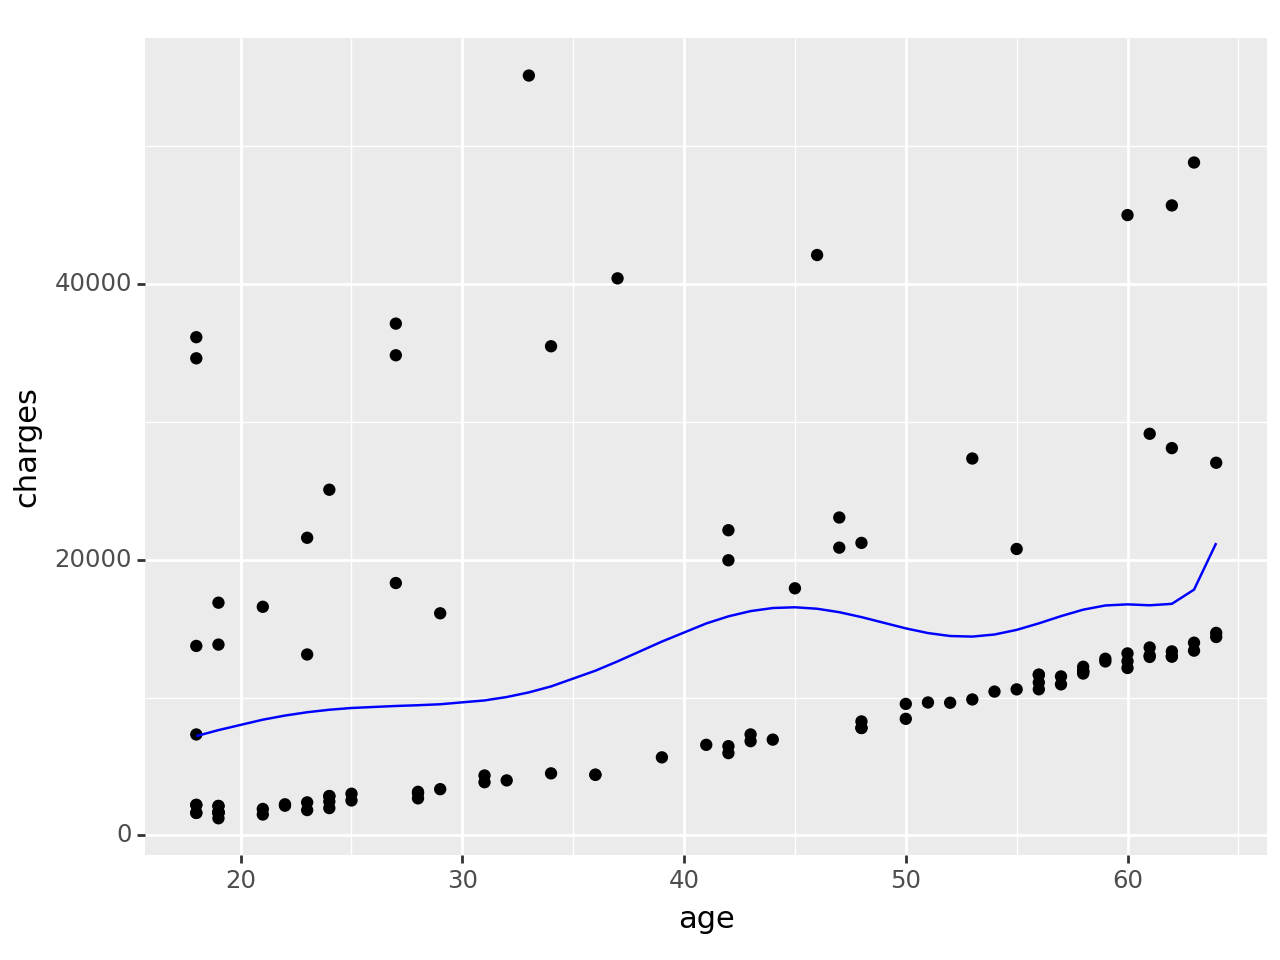

<Figure Size: (640 x 480)>

In [65]:
(ggplot(plot_model_7,
  aes(
      x = "age",
      y = "charges"
))
+ geom_point()
+ geom_line(aes(y = "deg_12_predictions"), color = "blue")
)

# Part Four: New Data

In [66]:
insurance2 = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")

### Model 8: Age as Predictor Variable

In [67]:
X_train = insurance[['age']]
y_train = insurance['charges']

X_test = insurance2[['age']]
y_test = insurance2['charges']

lr = LinearRegression()

my_pipeline = Pipeline(
  [('ols', lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)
y_preds = fitted_pipeline.predict(X_test)

mse_model_8 = mean_squared_error(y_test, y_preds)
r_sq_model_8 = r2_score(y_test, y_preds)

In [68]:
r_sq_model_8

0.12236515675533055

In [69]:
mse_model_8

136077136.50195494

### Model 9: Age and BMI as Predictor Variables

In [70]:
X_train = insurance[['age', 'bmi']]
y_train = insurance['charges']

X_test = insurance2[['age', 'bmi']]
y_test = insurance2['charges']

lr = LinearRegression()

my_pipeline = Pipeline(
  [('ols', lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)
y_preds = fitted_pipeline.predict(X_test)

mse_model_9 = mean_squared_error(y_test, y_preds)
r_sq_model_9 = r2_score(y_test, y_preds)

In [71]:
r_sq_model_9

0.14455628272331222

In [72]:
mse_model_9

132636406.1108129

### Model 10: Age, BMI, and Smoker as Predictor Variables

In [73]:
X_train = insurance[['age', 'bmi', 'smoker']]
y_train = insurance['charges']

X_test = insurance2[['age', 'bmi', 'smoker']]
y_test = insurance2['charges']

## Preprocessing: One-Hot-Encode
## Model Spec: Linear Regression

lr = LinearRegression()
enc = OneHotEncoder(sparse_output = False)


ct = ColumnTransformer(
    [('dummify_smoker', enc, ['smoker'])], remainder = "passthrough"
)

my_pipeline = Pipeline(
  [('dummify', ct), ('ols', lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)
y_preds = fitted_pipeline.predict(X_test)

mse_model_10 = mean_squared_error(y_test, y_preds)
r_sq_model_10 = r2_score(y_test, y_preds)

In [74]:
r_sq_model_10

0.7718311565047792

In [75]:
mse_model_10

35377541.241416454

### Model 11: Age and BMI, with Both Having an Interaction Term with Smoker

In [76]:
model_11_training_data = pd.get_dummies(insurance, columns = ['smoker'])
model_11_training_data['age*smoker'] = model_11_training_data['age'] * model_11_training_data['smoker_no']
model_11_training_data['bmi*smoker'] = model_11_training_data['bmi'] * model_11_training_data['smoker_no']

model_11_testing_data = pd.get_dummies(insurance2, columns = ['smoker'])
model_11_testing_data['age*smoker'] = model_11_testing_data['age'] * model_11_testing_data['smoker_no']
model_11_testing_data['bmi*smoker'] = model_11_testing_data['bmi'] * model_11_testing_data['smoker_no']

In [77]:
model_11_training_data.head()

,age,sex,bmi,region,charges,smoker_no,smoker_yes,age*smoker,bmi*smoker
0,19,female,27.900,southwest,16884.92400,0,1,0,0.000
1,33,male,22.705,northwest,21984.47061,1,0,33,22.705
2,32,male,28.880,northwest,3866.85520,1,0,32,28.880
3,31,female,25.740,southeast,3756.62160,1,0,31,25.740
4,60,female,25.840,northwest,28923.13692,1,0,60,25.840


In [78]:
model_11_testing_data.head()

,age,sex,bmi,region,charges,smoker_no,smoker_yes,age*smoker,bmi*smoker
0,23,male,34.400,southwest,1826.84300,1,0,23,34.400
1,56,male,40.300,southwest,10602.38500,1,0,56,40.300
2,18,male,34.100,southeast,1137.01100,1,0,18,34.100
3,63,female,23.085,northeast,14451.83515,1,0,63,23.085
4,63,male,28.310,northwest,13770.09790,1,0,63,28.310


In [79]:
X_train = model_11_training_data[['age', 'bmi', 'age*smoker', 'bmi*smoker']]
y_train = model_11_training_data['charges']

X_test = model_11_testing_data[['age', 'bmi', 'age*smoker', 'bmi*smoker']]
y_test = model_11_testing_data['charges']

## Model Spec: Linear Regression

lr = LinearRegression()

my_pipeline = Pipeline(
  [('ols', lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)
y_preds = fitted_pipeline.predict(X_test)

mse_model_11 = mean_squared_error(y_test, y_preds)
r_sq_model_11 = r2_score(y_test, y_preds)

In [80]:
r_sq_model_11

0.8400778135676981

In [81]:
mse_model_11

24795908.412643366

### Model 12: Age, BMI, and Smoker with Age and BMI Having Interaction Terms with Smoker

In [82]:
model_12_training_data = pd.get_dummies(insurance, columns = ['smoker'])
model_12_training_data['age*smoker'] = model_12_training_data['age'] * model_12_training_data['smoker_no']
model_12_training_data['bmi*smoker'] = model_12_training_data['bmi'] * model_12_training_data['smoker_no']

model_12_testing_data = pd.get_dummies(insurance2, columns = ['smoker'])
model_12_testing_data['age*smoker'] = model_12_testing_data['age'] * model_12_testing_data['smoker_no']
model_12_testing_data['bmi*smoker'] = model_12_testing_data['bmi'] * model_12_testing_data['smoker_no']

In [83]:
X_train = model_12_training_data[['age', 'bmi', 'smoker_no', 'age*smoker', 'bmi*smoker']]
y_train = model_12_training_data['charges']

X_test = model_12_testing_data[['age', 'bmi', 'smoker_no', 'age*smoker', 'bmi*smoker']]
y_test = model_12_testing_data['charges']

## Model Spec: Linear Regression

lr = LinearRegression()

my_pipeline = Pipeline(
  [('ols', lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)
y_preds = fitted_pipeline.predict(X_test)

mse_model_12 = mean_squared_error(y_test, y_preds)
r_sq_model_12 = r2_score(y_test, y_preds)

In [84]:
r_sq_model_12

0.8594886795699617

In [85]:
mse_model_12

21786256.866852555

Based on the MSE alone, Model 12 is the superior model as it has the lowest MSE.

In [86]:
model_12_testing_data['residuals'] = y_test - y_preds

In [87]:
model_12_testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         143 non-null    int64  
 1   sex         143 non-null    object 
 2   bmi         143 non-null    float64
 3   region      143 non-null    object 
 4   charges     143 non-null    float64
 5   smoker_no   143 non-null    uint8  
 6   smoker_yes  143 non-null    uint8  
 7   age*smoker  143 non-null    int64  
 8   bmi*smoker  143 non-null    float64
 9   residuals   143 non-null    float64
dtypes: float64(4), int64(2), object(2), uint8(2)
memory usage: 9.3+ KB


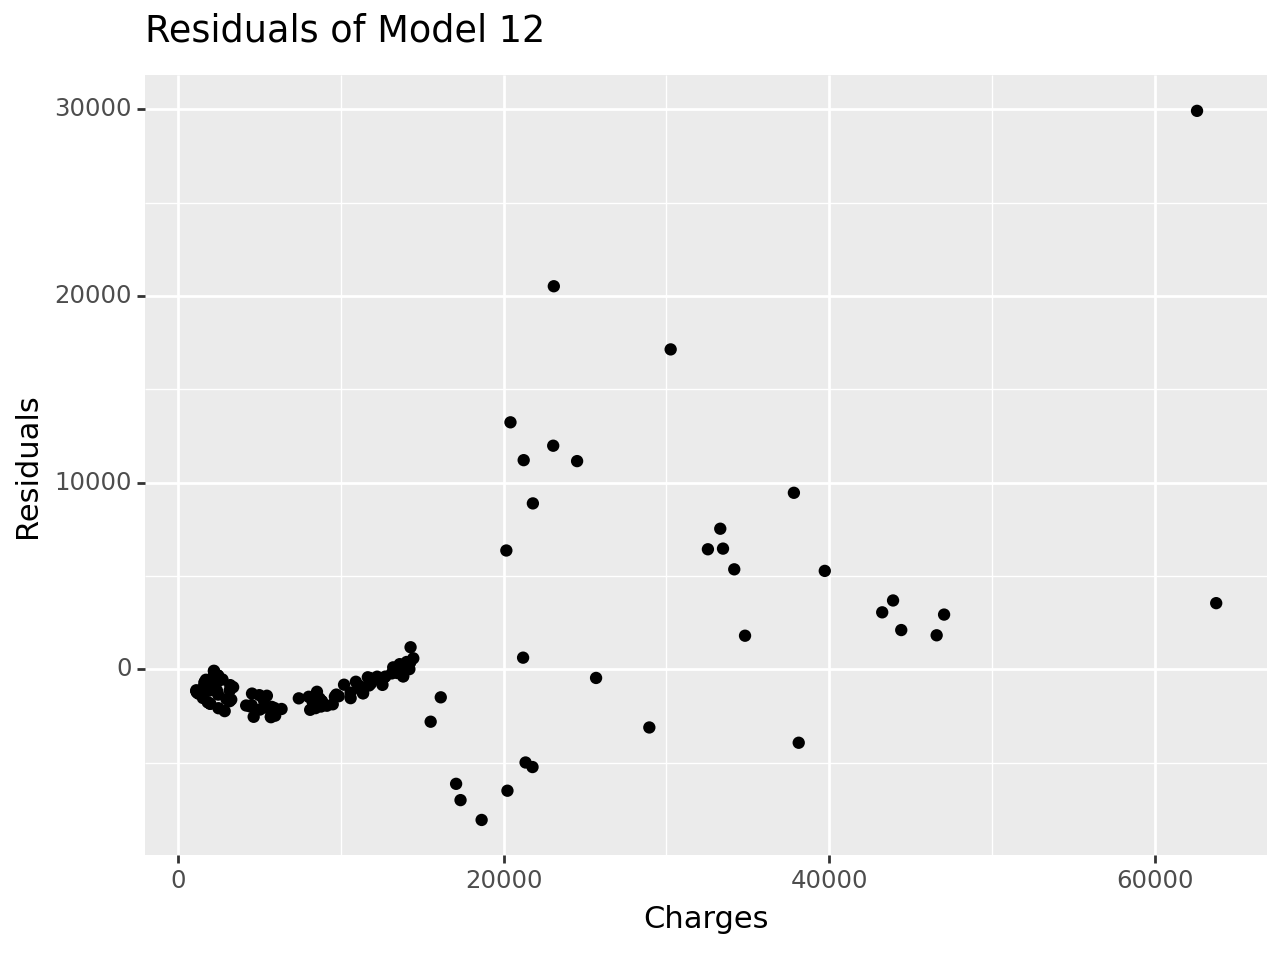

<Figure Size: (640 x 480)>

In [88]:
(ggplot(model_12_testing_data,
  aes(
      x = "charges",
      y = "residuals"
))
+ geom_point()
+ labs(x = "Charges", y = "Residuals", title = "Residuals of Model 12")
)

# Part Five: Full Exploration

### Model 13: Age^2, BMI^2, with Both of Their Interaction Terms with Smoker

In [89]:
model_13_training_data = pd.get_dummies(insurance, columns = ['smoker'])
model_13_training_data['age^2'] = model_13_training_data['age']**2
model_13_training_data['bmi^2'] = model_13_training_data['bmi']**2
model_13_training_data['age^2*smoker'] = model_13_training_data['age^2'] * model_13_training_data['smoker_no']
model_13_training_data['bmi^2*smoker'] = model_13_training_data['bmi^2'] * model_13_training_data['smoker_no']

model_13_testing_data = pd.get_dummies(insurance2, columns = ['smoker'])
model_13_testing_data['age^2'] = model_13_testing_data['age']**2
model_13_testing_data['bmi^2'] = model_13_testing_data['bmi']**2
model_13_testing_data['age^2*smoker'] = model_13_testing_data['age^2'] * model_13_testing_data['smoker_no']
model_13_testing_data['bmi^2*smoker'] = model_13_testing_data['bmi^2'] * model_13_testing_data['smoker_no']

In [90]:
X_train = model_13_training_data[['age', 'bmi', 'smoker_no', 'age^2*smoker', 'bmi^2*smoker']]
y_train = model_13_training_data['charges']

X_test = model_13_testing_data[['age', 'bmi', 'smoker_no', 'age^2*smoker', 'bmi^2*smoker']]
y_test = model_13_testing_data['charges']

## Preprocessing: Polynomial Deg 2
## Model Spec: Linear Regression

lr = LinearRegression()


my_pipeline = Pipeline(
  [('ols', lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)
y_preds = fitted_pipeline.predict(X_test)

mse_model_13 = mean_squared_error(y_test, y_preds)
r_sq_model_13 = r2_score(y_test, y_preds)

In [91]:
r_sq_model_13

0.8556369665722461

In [92]:
mse_model_13

22383464.32664161

### Model 14: Age^4, BMI^4, with Both of Their Interaction Terms with Smoker

In [93]:
model_14_training_data = pd.get_dummies(insurance, columns = ['smoker'])
model_14_training_data['age^4'] = model_14_training_data['age']**4
model_14_training_data['bmi^4'] = model_14_training_data['bmi']**4
model_14_training_data['age^4*smoker'] = model_14_training_data['age^4'] * model_14_training_data['smoker_no']
model_14_training_data['bmi^4*smoker'] = model_14_training_data['bmi^4'] * model_14_training_data['smoker_no']

model_14_testing_data = pd.get_dummies(insurance2, columns = ['smoker'])
model_14_testing_data['age^4'] = model_14_testing_data['age']**4
model_14_testing_data['bmi^4'] = model_14_testing_data['bmi']**4
model_14_testing_data['age^4*smoker'] = model_14_testing_data['age^4'] * model_14_testing_data['smoker_no']
model_14_testing_data['bmi^4*smoker'] = model_14_testing_data['bmi^4'] * model_14_testing_data['smoker_no']

In [94]:
X_train = model_14_training_data[['age', 'bmi', 'smoker_no', 'age^4*smoker', 'bmi^4*smoker']]
y_train = model_14_training_data['charges']

X_test = model_14_testing_data[['age', 'bmi', 'smoker_no', 'age^4*smoker', 'bmi^4*smoker']]
y_test = model_14_testing_data['charges']

## Preprocessing: Polynomial Deg 4
## Model Spec: Linear Regression

lr = LinearRegression()

my_pipeline = Pipeline(
  [('ols', lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)
y_preds = fitted_pipeline.predict(X_test)

mse_model_14 = mean_squared_error(y_test, y_preds)
r_sq_model_14 = r2_score(y_test, y_preds)

In [95]:
r_sq_model_14

0.8143571515538408

In [96]:
mse_model_14

28783892.780766916

### Model 15: Age, BMI, Smoker, Age^2, BMI^2, and the Interaction Terms Between Age and Smoker, BMI and Smoker, and Age, BMI and Smoker

In [97]:
model_15_training_data = pd.get_dummies(insurance, columns = ['smoker'])
model_15_training_data['age^2'] = model_15_training_data['age']**2
model_15_training_data['bmi^2'] = model_15_training_data['bmi']**2
model_15_training_data['age*bmi'] = model_15_training_data['age'] * model_15_training_data['bmi']
model_15_training_data['age*smoker'] = model_15_training_data['age'] * model_15_training_data['smoker_no']
model_15_training_data['bmi*smoker'] = model_15_training_data['bmi'] * model_15_training_data['smoker_no']
model_15_training_data['age*bmi*smoker'] = model_15_training_data['age'] * model_15_training_data['bmi'] * model_15_training_data['smoker_no']

model_15_testing_data = pd.get_dummies(insurance2, columns = ['smoker'])
model_15_testing_data['age^2'] = model_15_testing_data['age']**2
model_15_testing_data['bmi^2'] = model_15_testing_data['bmi']**2
model_15_testing_data['age*bmi'] = model_15_testing_data['age'] * model_15_testing_data['bmi']
model_15_testing_data['age*smoker'] = model_15_testing_data['age'] * model_15_testing_data['smoker_no']
model_15_testing_data['bmi*smoker'] = model_15_testing_data['bmi'] * model_15_testing_data['smoker_no']
model_15_testing_data['age*bmi*smoker'] = model_15_testing_data['age'] * model_15_testing_data['bmi'] * model_15_testing_data['smoker_no']

In [98]:
X_train = model_15_training_data[['age', 'bmi', 'smoker_no', 'age^2', 'bmi^2', 'age*smoker', 'bmi*smoker', 'age*bmi*smoker']]
y_train = model_15_training_data['charges']

X_test = model_15_testing_data[['age', 'bmi', 'smoker_no', 'age^2', 'bmi^2', 'age*smoker', 'bmi*smoker', 'age*bmi*smoker']]
y_test = model_15_testing_data['charges']

## Model Spec: Linear Regression

lr = LinearRegression()

my_pipeline = Pipeline(
  [('ols', lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)
y_preds = fitted_pipeline.predict(X_test)

mse_model_15 = mean_squared_error(y_test, y_preds)
r_sq_model_15 = r2_score(y_test, y_preds)

In [99]:
r_sq_model_15

0.8611282823938757

In [100]:
mse_model_15

21532036.72165654

## Model 16: Age, BMI, Smoker, Age^2, BMI^2, and the Interaction Terms Between Age and BMI, Age and Smoker, BMI and Smoker, and Age, BMI and Smoker

In [101]:
model_16_training_data = pd.get_dummies(insurance, columns = ['smoker'])
model_16_training_data['age^2'] = model_16_training_data['age']**2
model_16_training_data['bmi^2'] = model_16_training_data['bmi']**2
model_16_training_data['age*bmi'] = model_16_training_data['age'] * model_16_training_data['bmi']
model_16_training_data['age*smoker'] = model_16_training_data['age'] * model_16_training_data['smoker_no']
model_16_training_data['bmi*smoker'] = model_16_training_data['bmi'] * model_16_training_data['smoker_no']
model_16_training_data['age*bmi*smoker'] = model_16_training_data['age'] * model_16_training_data['bmi'] * model_16_training_data['smoker_no']

model_16_testing_data = pd.get_dummies(insurance2, columns = ['smoker'])
model_16_testing_data['age^2'] = model_16_testing_data['age']**2
model_16_testing_data['bmi^2'] = model_16_testing_data['bmi']**2
model_16_testing_data['age*bmi'] = model_16_testing_data['age'] * model_16_testing_data['bmi']
model_16_testing_data['age*smoker'] = model_16_testing_data['age'] * model_16_testing_data['smoker_no']
model_16_testing_data['bmi*smoker'] = model_16_testing_data['bmi'] * model_16_testing_data['smoker_no']
model_16_testing_data['age*bmi*smoker'] = model_16_testing_data['age'] * model_16_testing_data['bmi'] * model_16_testing_data['smoker_no']

In [102]:
X_train = model_16_training_data[['age', 'bmi', 'smoker_no', 'age^2', 'bmi^2', 'age*bmi', 'age*smoker', 'bmi*smoker', 'age*bmi*smoker']]
y_train = model_16_training_data['charges']

X_test = model_16_testing_data[['age', 'bmi', 'smoker_no', 'age^2', 'bmi^2', 'age*bmi', 'age*smoker', 'bmi*smoker', 'age*bmi*smoker']]
y_test = model_16_testing_data['charges']

## Model Spec: Linear Regression

lr = LinearRegression()

my_pipeline = Pipeline(
  [('ols', lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)
y_preds = fitted_pipeline.predict(X_test)

mse_model_16 = mean_squared_error(y_test, y_preds)
r_sq_model_16 = r2_score(y_test, y_preds)

In [103]:
r_sq_model_16

0.8620738190296706

In [104]:
mse_model_16

21385431.42351116

In [105]:
model_16_testing_data['residuals'] = y_test - y_preds

### Model 17: Age, BMI, Smoker, Age^2, BMI^2, and the Interaction Terms Between Age^2 and Smoker, BMI^2 and Smoker, and Age^2, BMI^2 and Smoker

In [106]:
model_17_training_data = pd.get_dummies(insurance, columns = ['smoker'])
model_17_training_data['age^2'] = model_17_training_data['age']**2
model_17_training_data['bmi^2'] = model_17_training_data['bmi']**2
model_17_training_data['age^2*bmi^2'] = model_17_training_data['age^2'] * model_17_training_data['bmi^2']
model_17_training_data['age^2*smoker'] = model_17_training_data['age^2'] * model_17_training_data['smoker_no']
model_17_training_data['bmi^2*smoker'] = model_17_training_data['bmi^2'] * model_17_training_data['smoker_no']
model_17_training_data['age^2*bmi^2*smoker'] = model_17_training_data['age^2'] * model_17_training_data['bmi^2'] * model_17_training_data['smoker_no']

model_17_testing_data = pd.get_dummies(insurance2, columns = ['smoker'])
model_17_testing_data['age^2'] = model_17_testing_data['age']**2
model_17_testing_data['bmi^2'] = model_17_testing_data['bmi']**2
model_17_testing_data['age^2*bmi^2'] = model_17_testing_data['age^2'] * model_17_testing_data['bmi^2']
model_17_testing_data['age^2*smoker'] = model_17_testing_data['age^2'] * model_17_testing_data['smoker_no']
model_17_testing_data['bmi^2*smoker'] = model_17_testing_data['bmi^2'] * model_17_testing_data['smoker_no']
model_17_testing_data['age^2*bmi^2*smoker'] = model_17_testing_data['age^2'] * model_17_testing_data['bmi^2'] * model_17_testing_data['smoker_no']

In [107]:
X_train = model_17_training_data[['age', 'bmi', 'smoker_no', 'age^2', 'bmi^2', 'age^2*smoker', 'bmi^2*smoker', 'age^2*bmi^2*smoker']]
y_train = model_17_training_data['charges']

X_test = model_17_testing_data[['age', 'bmi', 'smoker_no', 'age^2', 'bmi^2', 'age^2*smoker', 'bmi^2*smoker', 'age^2*bmi^2*smoker']]
y_test = model_17_testing_data['charges']

## Model Spec: Linear Regression

lr = LinearRegression()

my_pipeline = Pipeline(
  [('ols', lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)
y_preds = fitted_pipeline.predict(X_test)

mse_model_17 = mean_squared_error(y_test, y_preds)
r_sq_model_17 = r2_score(y_test, y_preds)

In [108]:
r_sq_model_17

0.8591340268779237

In [109]:
mse_model_17

21841245.707777362

# Residual Plot of Best Model

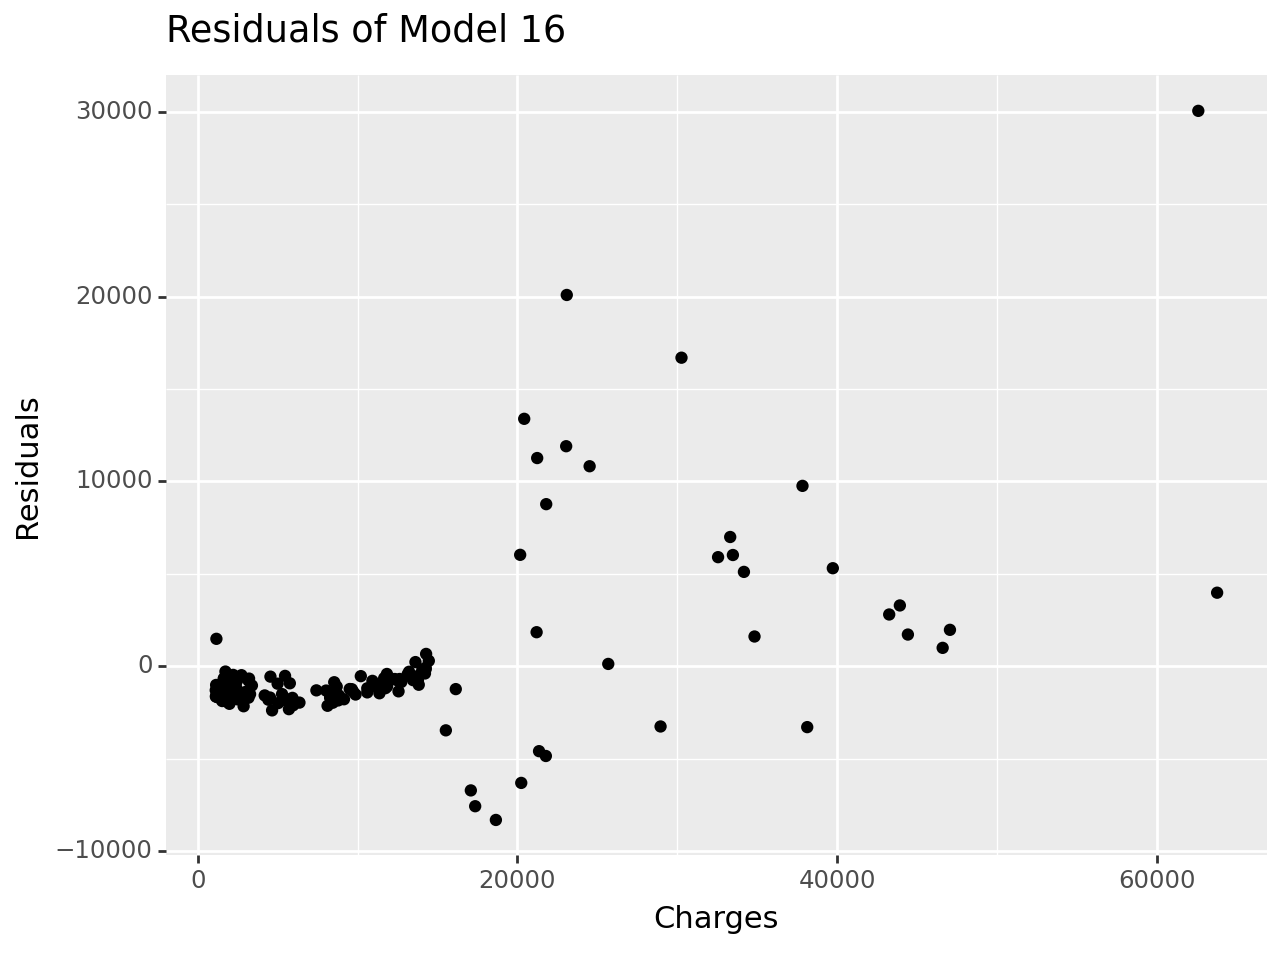

<Figure Size: (640 x 480)>

In [110]:
(ggplot(model_16_testing_data,
  aes(
      x = "charges",
      y = "residuals"
))
+ geom_point()
+ labs(x = "Charges", y = "Residuals", title = "Residuals of Model 16 ")
)

# Citations

- https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html



Assisted by ChatGPT for:
- Honing in on important variables for improved R^2(Feature Selection)